# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [66]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import statsmodels.api as sm
style.use('ggplot')
%matplotlib inline

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)
df = pd.DataFrame({'x':X,'y':Y})

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


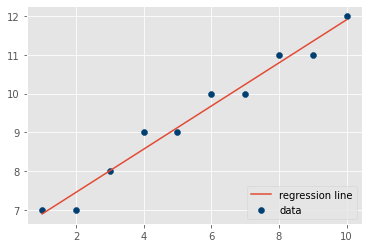

In [67]:
#calc slope from data points
def calc_slope(xs,ys):
    x_bar = np.mean(xs)
    y_bar = np.mean(ys)
    multimean = np.mean(xs*ys)
    return (x_bar*y_bar-multimean)/(x_bar**2-np.mean(xs*xs))
#calc intercept from data points
def best_fit(xs, ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    return m, c

def reg_line (m, c, X):
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):
    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    return sse

def r_squared(ys_real, ys_predicted):
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def prettyprint(xs,ys):
    slope = calc_slope(xs,ys)
    y_int = best_fit(xs,ys)
    r_sq = r_squared(xs,ys)
    slope_print = 'Slope: {}'.format(slope)
    y_print = 'Y-Intercept: {}'.format(y_int)
    arrr = 'R-squared: {}'.format(r_squared)
    model = 'Equation: Y = {}*X + {}'.format(slope,y_int)
    return slope_print,y_print,arrr,model


def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

m, c = best_fit(X, Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y, Y_pred)

print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m, 2))
print ('Y-Intercept:', round(c, 2))
print ('R-Squared:', round(r_squared, 2))
print ('----------------------------')
print ('Model: Y =',round(m, 2),'* X +', round(c, 2))

plot_reg(X, Y, Y_pred)
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33


## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

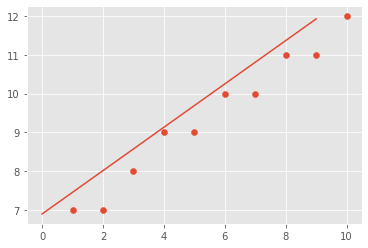

In [68]:
df['predicted_ys'] = df.x.map(lambda x: 0.56*x + 6.33)
plt.scatter(df.x,df.y)
plt.plot(df.predicted_ys);

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [69]:
df = pd.read_csv('heightweight.csv')
import plotly.express as px
df.height

0     68
1     71
2     61
3     69
4     71
5     58
6     72
7     73
8     58
9     74
10    61
11    59
12    69
13    68
14    64
15    69
16    72
17    66
18    65
19    69
Name: height, dtype: int64

In [72]:
fig = px.scatter(df,df.height,df.weight,trendline="ols",title='Weight as a function of Height OLS regression')
results = px.get_trendline_results(fig)
model = sm.formula.ols(formula='weight~height',data=df).fit()
fig.show()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.35e-13
Time:                        16:47:41   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""